In [37]:
from mesa.batchrunner import batch_run
from mesa_model.fungi_model import FungiModel
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sns.set_context("paper")

In [38]:
parameters = {}


run = batch_run(
    FungiModel, 
    parameters,
    number_processes=1,
    data_collection_period=1,
    iterations=1,
    max_steps=99,
)

100%|██████████| 1/1 [00:06<00:00,  6.67s/it]


In [39]:
batch_df = pd.DataFrame(run)

In [40]:
batch_df.shape

(100, 6)

In [41]:
batch_df.head()

,RunId,iteration,Step,agent_count,total_hypha_length,total_substrate
0,0,0,0,24,400.0,0.749976
1,0,0,1,33,800.0,0.749928
2,0,0,2,42,1200.0,0.749856
3,0,0,3,51,1650.0,0.749757
4,0,0,4,60,2100.0,0.749631


In [42]:
batch_df[batch_df["iteration"] == 0]

,RunId,iteration,Step,agent_count,total_hypha_length,total_substrate
0,0,0,0,24,400.000000,0.749976
1,0,0,1,33,800.000000,0.749928
2,0,0,2,42,1200.000000,0.749856
3,0,0,3,51,1650.000000,0.749757
4,0,0,4,60,2100.000000,0.749631
...,...,...,...,...,...,...
95,0,0,95,9397,412969.101972,0.320157
96,0,0,96,9575,421304.934462,0.310812
97,0,0,97,9757,429357.110926,0.301620
98,0,0,98,9941,437218.461389,0.292617


In [43]:
batch_df[batch_df["Step"] == 0]

,RunId,iteration,Step,agent_count,total_hypha_length,total_substrate
0,0,0,0,24,400.0,0.749976


<AxesSubplot: ylabel='Total Substrate'>

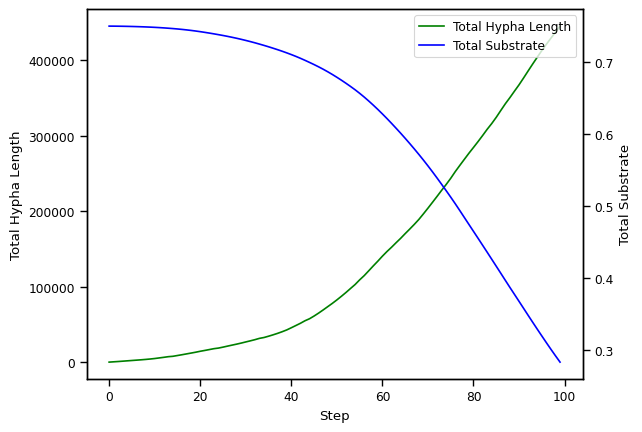

In [44]:
ax = plt.axes()
ax.set_ylabel("Total Hypha Length")
sns.lineplot(data=batch_df[["total_hypha_length", "Step"]], x="Step", y="total_hypha_length", color="g", ax=ax)
ax2 = plt.twinx()

total_hypha_line = mlines.Line2D([], [], color='green', label='Total Hypha Length')
total_substrate_line = mlines.Line2D([], [], color='blue', label='Total Substrate')
ax2.legend(handles=[total_hypha_line, total_substrate_line])
ax2.set_ylabel("Total Substrate")
sns.lineplot(data=batch_df["total_substrate"], color="b", ax=ax2)